# 1. Modules extérieurs et versions

In [1]:
import pandas as pd
#import modin.pandas as pd
import numpy as np
import seaborn as sns
import outils_cleaning as clean
import importlib
from importlib import reload
from importlib.metadata import version
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sklearn
from sklearn import decomposition, preprocessing
import warnings
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter('ignore', UserWarning)

ModuleNotFoundError: No module named 'outils_cleaning'

In [2]:
reload(outils)
print("Module %s version: %s" % (pd.__name__ , pd.__version__))
print("Module %s version: %s" % (np.__name__ , np.__version__))
print("Module %s version: %s" % (sns.__name__ , sns.__version__))
print("Module %s version: %s" % (outils.__name__ , outils.__version__))
print("Module %s version: %s" % (importlib.__name__ , version('wheel')))

Module pandas version: 1.4.4
Module numpy version: 1.21.5
Module seaborn version: 0.11.2
Module ma_boite_a_outils version: 1.49
Module importlib version: 0.37.1


## 1.1 Pandas display option

In [3]:
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_rows', 350)
pd.set_option('display.max_column', 200)
pd.set_option('display.width', 150)
pd.set_option('display.precision', 5)
pd.set_option('display.max_colwidth',150)

# 2.Résumé du dataframe d'exploration

In [4]:
liste_colonnes_mixed_type = ['code',
                             'origins_en',
                             'quantity',
                             'product_name',
                             'first_packaging_code_geo',
                             'allergens',
                             'traces',
                             'brand_owner',
                            'product_name', 'quantity', 'packaging_en', 'brands_tags',
       'categories_en', 'manufacturing_places_tags', 'labels_en',
       'countries_en', 'ingredients_tags', 'ingredients_analysis_tags',
       'additives_en', 'nutriscore_grade', 'pnns_groups_1', 'pnns_groups_2',
       'food_groups_en', 'ecoscore_grade', 'nutrient_levels_tags',
       'data_quality_errors_tags', 'main_category_en']


dict_convert_types = {i:'string' for i in liste_colonnes_mixed_type}

df_exploration = pd.read_pickle('./df_clean.pkl')
#conversion des objets en string
df_exploration.astype(dict_convert_types)
#Conversion des réels 64 bits en 32 bits pour économiser de la mémoire
df_exploration[df_exploration.select_dtypes(np.float64).columns] = df_exploration.select_dtypes(np.float64).astype(np.float32)

## 2.1.Aperçu du dataframe

In [5]:
df_exploration.head(5)

,code,product_name,quantity,packaging_en,brands_tags,categories_en,origins_en,manufacturing_places_tags,labels_en,first_packaging_code_geo,countries_en,ingredients_tags,ingredients_analysis_tags,allergens,traces,additives_n,additives_en,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,food_groups_en,brand_owner,ecoscore_score,ecoscore_grade,nutrient_levels_tags,product_quantity,data_quality_errors_tags,completeness,main_category_en,energy_100g_kj_renamed,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,omega-9-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,starch_100g,polyols_100g,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,jeunes pousses,NaN,NaN,endives,NaN,<NA>,NaN,NaN,<NA>,France,NaN,NaN,<NA>,<NA>,0.00,NaN,NaN,NaN,NaN,unknown,unknown,NaN,<NA>,NaN,unknown,NaN,NaN,NaN,0.20,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0000000000000207025004,Andrè,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,<NA>,Germany,NaN,NaN,<NA>,<NA>,0.00,NaN,NaN,NaN,NaN,unknown,unknown,NaN,<NA>,NaN,unknown,NaN,NaN,NaN,0.26,NaN,690.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,65.00,12.60,0.00,0.00,3.00,0.00,0.00,1.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,00000000000003429145,L.casei,NaN,NaN,NaN,NaN,Spain,NaN,NaN,<NA>,Spain,"en:semi-skimmed-milk,en:dairy,en:milk,en:sugar,en:added-sugar,en:disaccharide,es:leche-desnatada-en-polva,en:lactic-ferments,en:ferment,en:microbi...","en:palm-oil-free,en:non-vegan,en:vegetarian-status-unknown",<NA>,<NA>,0.00,NaN,NaN,NaN,NaN,unknown,unknown,NaN,<NA>,NaN,unknown,NaN,NaN,NaN,0.49,NaN,NaN,1.40,0.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.80,9.80,0.00,0.00,0.00,0.00,0.00,2.70,0.00,0.00,0.00,0.10,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,00000000000026772226,Skyr,480 g,NaN,danone,"Dairies,Desserts,Fermented foods,Fermented milk products,Cheeses,Dairy desserts,Cream cheeses,Skyr",<NA>,NaN,NaN,<NA>,France,NaN,NaN,<NA>,<NA>,0.00,NaN,-5.00,a,NaN,Milk and dairy products,Dairy desserts,"Milk and dairy products,Dairy desserts",<NA>,34.00,d,"en:fat-in-low-quantity,en:saturated-fat-in-low-quantity,en:sugars-in-low-quantity,en:salt-in-low-quantity",480.00,NaN,0.57,Skyr,2

## 2.2.Valeurs manquantes

In [6]:
outils.count_missing_values(df_exploration, True, False)

There is 47097397 missing (NaN) values over 273408975 values, ie 17.23%
----------------------------------------------------------------------------------
Données manquantes par critères


,Nombres de valeurs manquantes,% de valeurs manquantes
data_quality_errors_tags,2579315,99.06%
first_packaging_code_geo,2525373,96.98%
origins_en,2499592,95.99%
traces,2485478,95.45%
manufacturing_places_tags,2458249,94.41%
allergens,2393659,91.93%
brand_owner,2311378,88.77%
packaging_en,2243837,86.17%
additives_en,2149611,82.55%
ecoscore_score,2049028,78.69%


# 3. Type de variables

3.1 Variables numériques / non numériques

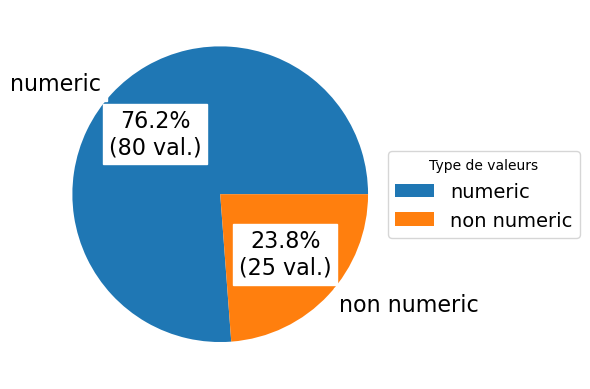

In [7]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} val.)".format(pct, absolute)



data = [len(list(df_exploration.select_dtypes(include = np.number).keys())),len(list(df_exploration.select_dtypes(exclude = np.number).keys()))]
wedges, texts, autotexts = plt.pie(
    data, labels=['numeric','non numeric'], autopct=lambda pct: func(pct, data), textprops={
        'fontsize': 16, 'color': 'black', 'backgroundcolor': 'w'}, explode=[0,0])
axes = plt.gca()
axes.legend(
    wedges,
   ['numeric','non numeric'],
    title='Type de valeurs',
    loc='center right',
    fontsize=14,
    bbox_to_anchor=(
        1,
        0,
        0.5,
        1))
plt.show()

In [8]:
# Variables numériques qualitatives
cols_num = df_exploration.select_dtypes(include=[np.number]).columns.to_list()

# Le nova grou
cols_num.remove('ecoscore_score')
cols_num.remove('nova_group')
cols_num.remove('nutriscore_score')
cols_num.remove('product_quantity')
cols_num.remove('completeness')

# 4. Nutriscore 

## 4.1 Caratéristiques de la variable nutriscore

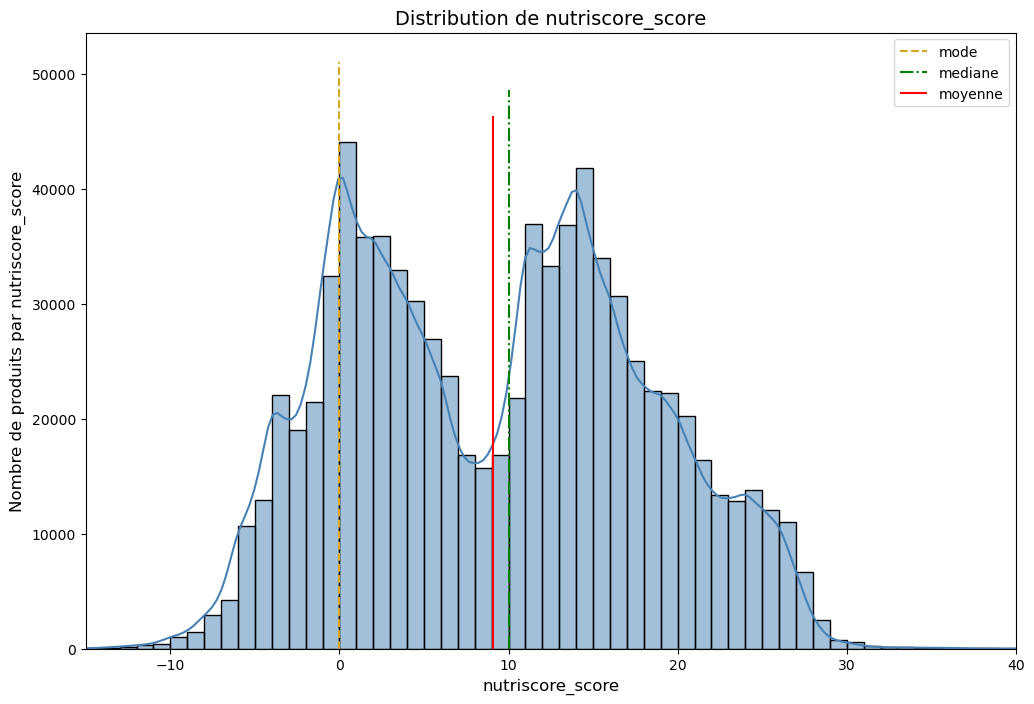

,stat,p_value,p value > 0.05,bilan
Shapiro-Wilks,0.98,0.00,False,H0 rejetée - distribution non normale
D'Agostino K^2,139105.97,0.00,False,H0 rejetée - distribution non normale
Anderson-Darling,7419.50,NaN,False,H0 rejetée - distribution non normale


Desc,nutriscore_score
mean,9.066764
median,10.000000
var,77.692482
std,8.814334
skew,0.116587
kurtosis,-0.938102
mode,0 0.00
Min,-15.000000
Max,40.000000


In [9]:
outils.plot_histogram(df_exploration,'nutriscore_score',False)
outils.test_normalite(df_exploration['nutriscore_score'].dropna(axis=0))
outils.stat_descriptives(df_exploration,['nutriscore_score'])

- La distribution des scores nutriscore ne suit pas une loi normale, ce qui est confirmé par les 3 tests;
- C'est une distribution quasi bimodale avec un mode en 0 et 14
- Le skewness est légérement positif, la distribution est étalée sur la droite, mais presque symétrique
- Le kurtosis est négatif, indiquant une distribution plus aplatie que celle que suivrait une loi normale


## 4.2 Correlation avec le nutriscore

On va regarder la matrice de corrélation entre le nutriscore et les variables quantitatives pour réduire le jeu de données aux variables "suffisamment" corrélées avec ce dernier

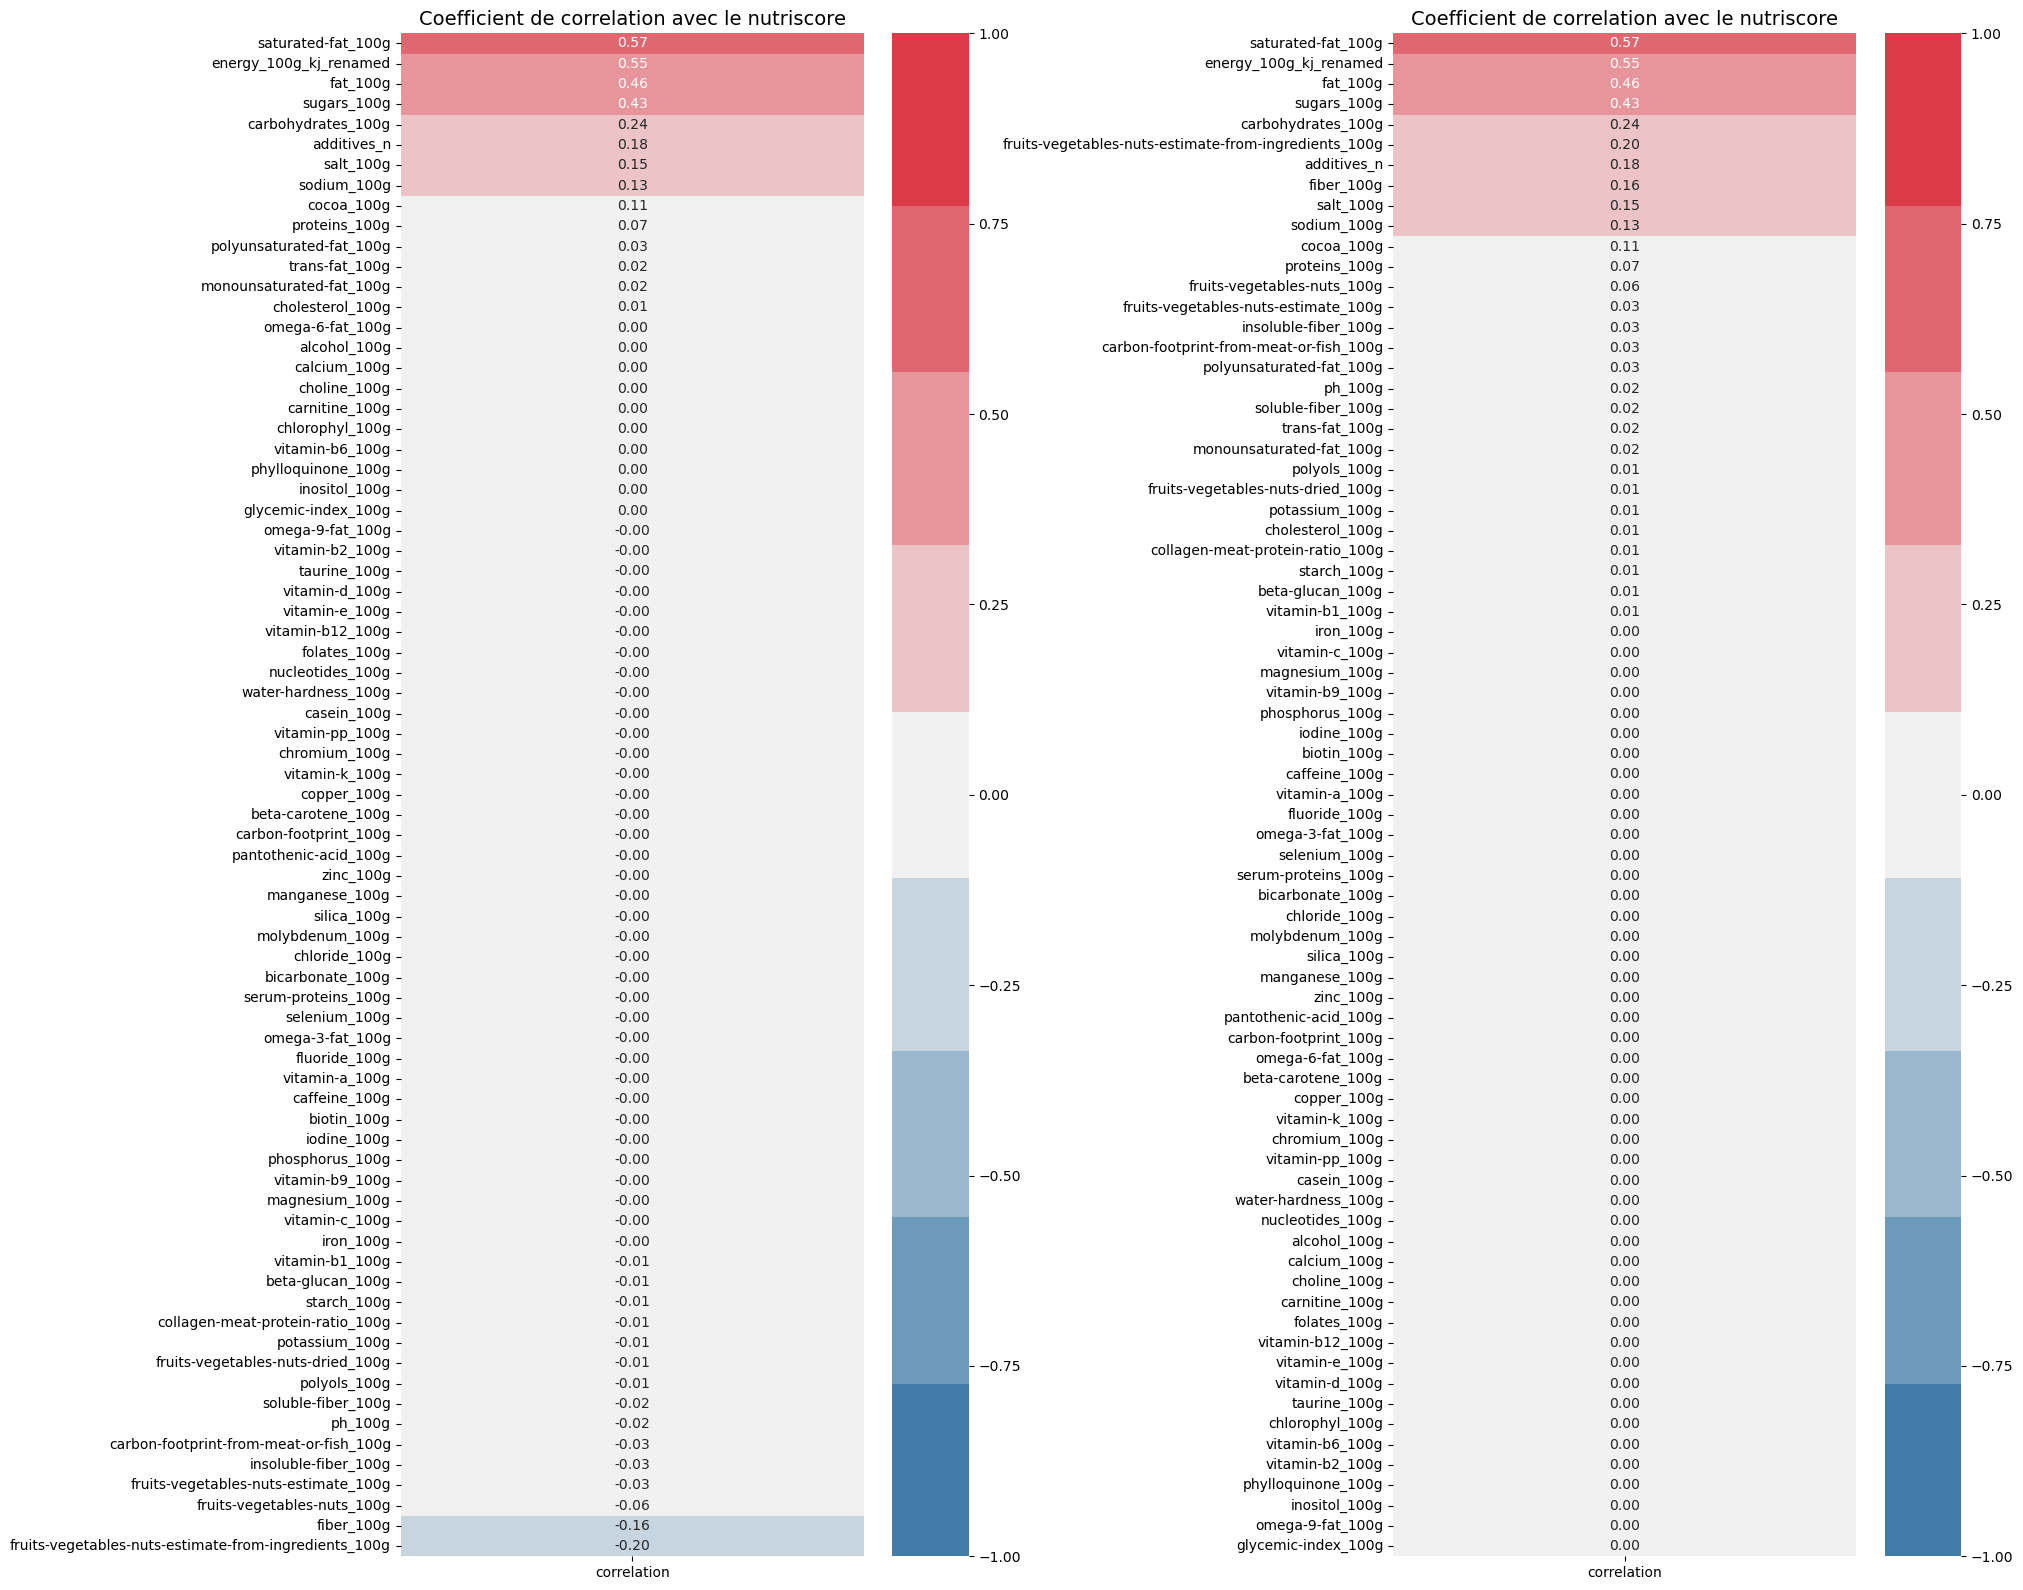

In [10]:
corr_nutriscore = pd.DataFrame(df_exploration[cols_num].corrwith(df_exploration["nutriscore_score"], method = 'pearson'))
corr_nutriscore.columns =['correlation']
outils.plot_correlation_matrix_with(corr_nutriscore,'correlation','nutriscore')

- On note une faible corrélation entre les variables quantitatives et le nutriscore;
- Le nutriscore et les graisses saturées et graisses pour 100g sont positivement corrélés, ce qui est assez logique. Plus le produit contient de matière grasse, plus le score du nutriscore est élévé et plus son grade sera faible;
- Le nutriscore et l'apport énergétique sont positivement corrélés;
- Le nutriscore et le taux de sucre pour 100g sont positivement corrélés, ce qui est assez logique. Plus le produit contient de sucre, plus le score du nutriscore est élévé et plus son grade sera faible;
- Le nombre d'additifs et le nutriscore sont négativements corrélés. De façon étonnante, moins un produit contient d'additifs, plus sont nutriscore sera élevé.
- La proportion de fruits, légumes, noix dans 100g de produit et le nutriscore sont négativements corrélés, ce qui est logique. Moins un produit contient de fruits, légumes ou noix, plus sont nutriscore sera élevé.

## 4.3 Matrice de corrélation avec le nutriscore réduite

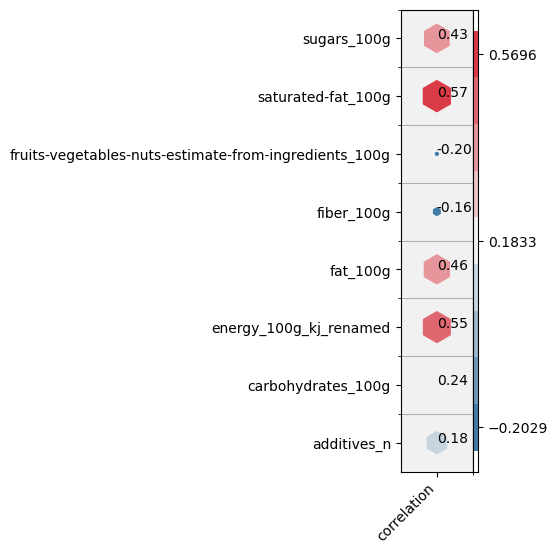

In [11]:
corr_nutriscore.drop(corr_nutriscore.loc[corr_nutriscore.abs().sort_values(by='correlation', ascending = False)['correlation'] <0.15].index, inplace = True)
plt.figure(figsize=(1, 6))
outils.heatmap(x_param = ['correlation' for i in range(corr_nutriscore.shape[0])],
    y_param=corr_nutriscore.index,
    size=corr_nutriscore['correlation'],
    color=corr_nutriscore['correlation'],
    palette=sns.diverging_palette(240, 10, n=9),
    marker='h')

## 4.4 Matrice de corrélation réduite aux variables qui corrélent le mieux

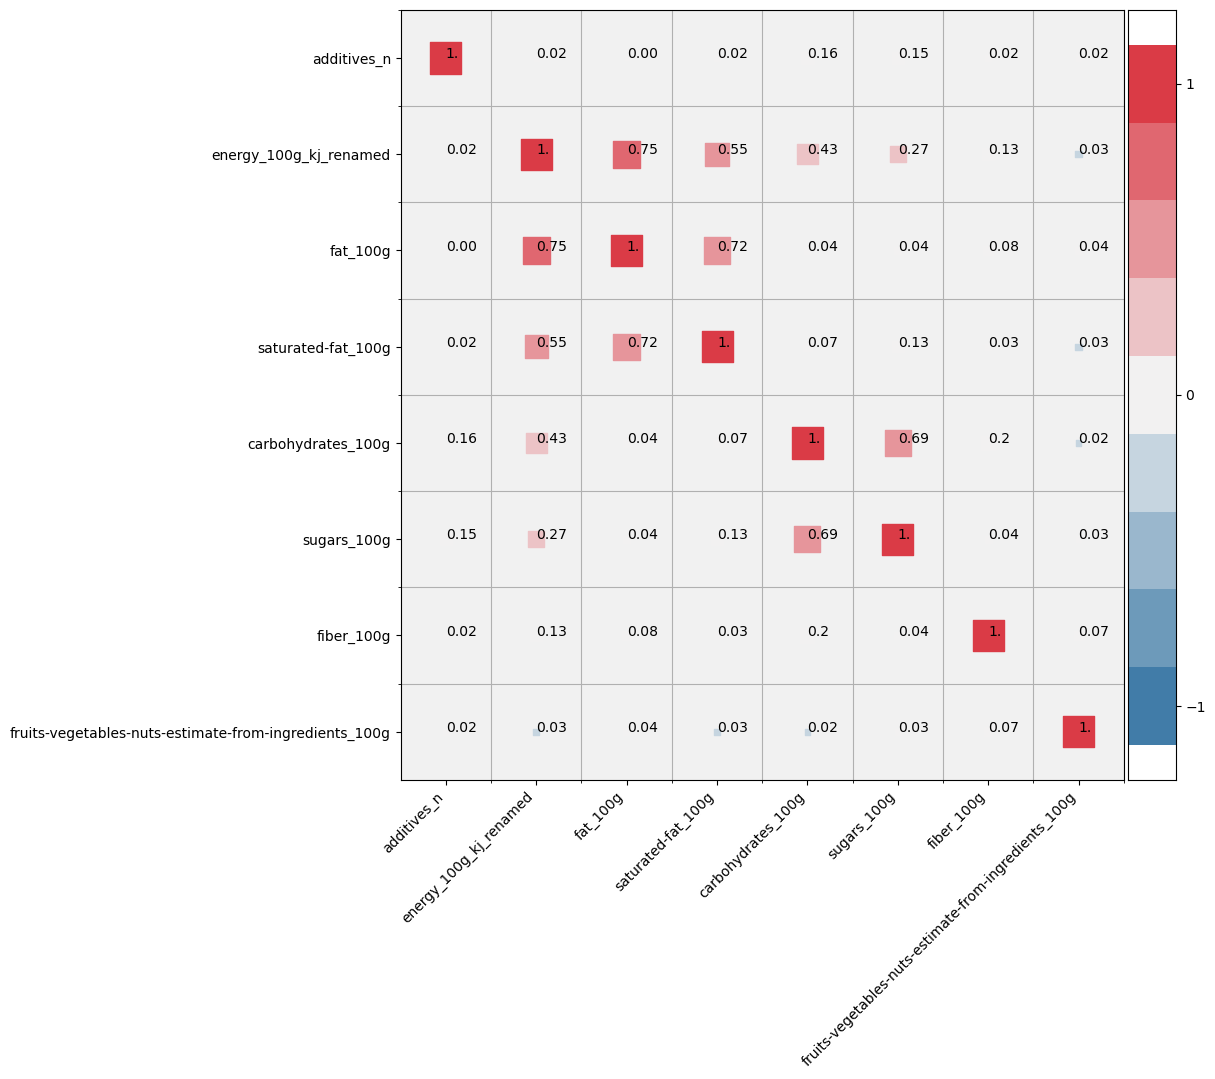

In [12]:
plt.figure(figsize=(10, 10))
colonnes_selectionnees = list(dict.fromkeys(list(corr_nutriscore.index)))
corr = df_exploration[colonnes_selectionnees].corr()
outils.corrplot(corr)

In [13]:
outils.pearson_significance_test(df_exploration,'nutriscore_score',list(corr_nutriscore.index))

,stat,p-value,p value < 0.05,bilan
additives_n,0.18,0.00,True,H0 acceptée - la corrélation est statistiquement significative
energy_100g_kj_renamed,0.55,0.00,True,H0 acceptée - la corrélation est statistiquement significative
fat_100g,0.46,0.00,True,H0 acceptée - la corrélation est statistiquement significative
saturated-fat_100g,0.57,0.00,True,H0 acceptée - la corrélation est statistiquement significative
carbohydrates_100g,0.24,0.00,True,H0 acceptée - la corrélation est statistiquement significative
sugars_100g,0.43,0.00,True,H0 acceptée - la corrélation est statistiquement significative
fiber_100g,-0.16,0.00,True,H0 acceptée - la corrélation est statistiquement significative
fruits-vegetables-nuts-estimate-from-ingredients_100g,-0.20,0.00,True,H0 acceptée - la corrélation est statistiquement significative


## 4.5Conclusion

- Toutes les corrélations sont statistiquements significatives
- On retrouve la corrélation attendue entre graisse et graisse saturée;
- On retrouve la corrélation entre les glucides (carbohydrates) et le sucre;
- L'apport énergétique est corrélé au taux de graisse et de glucide 



# 5. Novagroup

## 5.1 Caratéristiques de la variable nova group

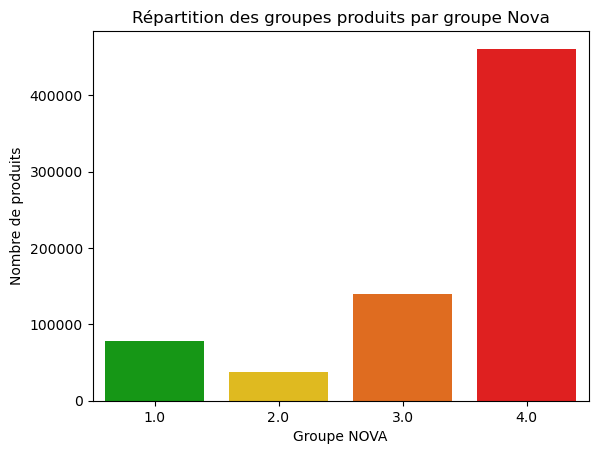

In [14]:
sns.countplot(data = df_exploration, x ='nova_group', palette=sns.color_palette( ['#00ac00', '#ffcd00', '#ff6600', '#ff0000']))
plt.xlabel('Groupe NOVA')
plt.ylabel('Nombre de produits')
plt.title('Répartition des groupes produits par groupe Nova')
plt.show()

In [15]:
outils.stat_descriptives(df_exploration,['nova_group'])

Desc,nova_group
mean,3.372298
median,4.000000
var,0.990350
std,0.995164
skew,-1.456405
kurtosis,0.789593
mode,0 4.00
Min,1.000000
Max,4.000000


## 5.2 Correlation avec le nova group

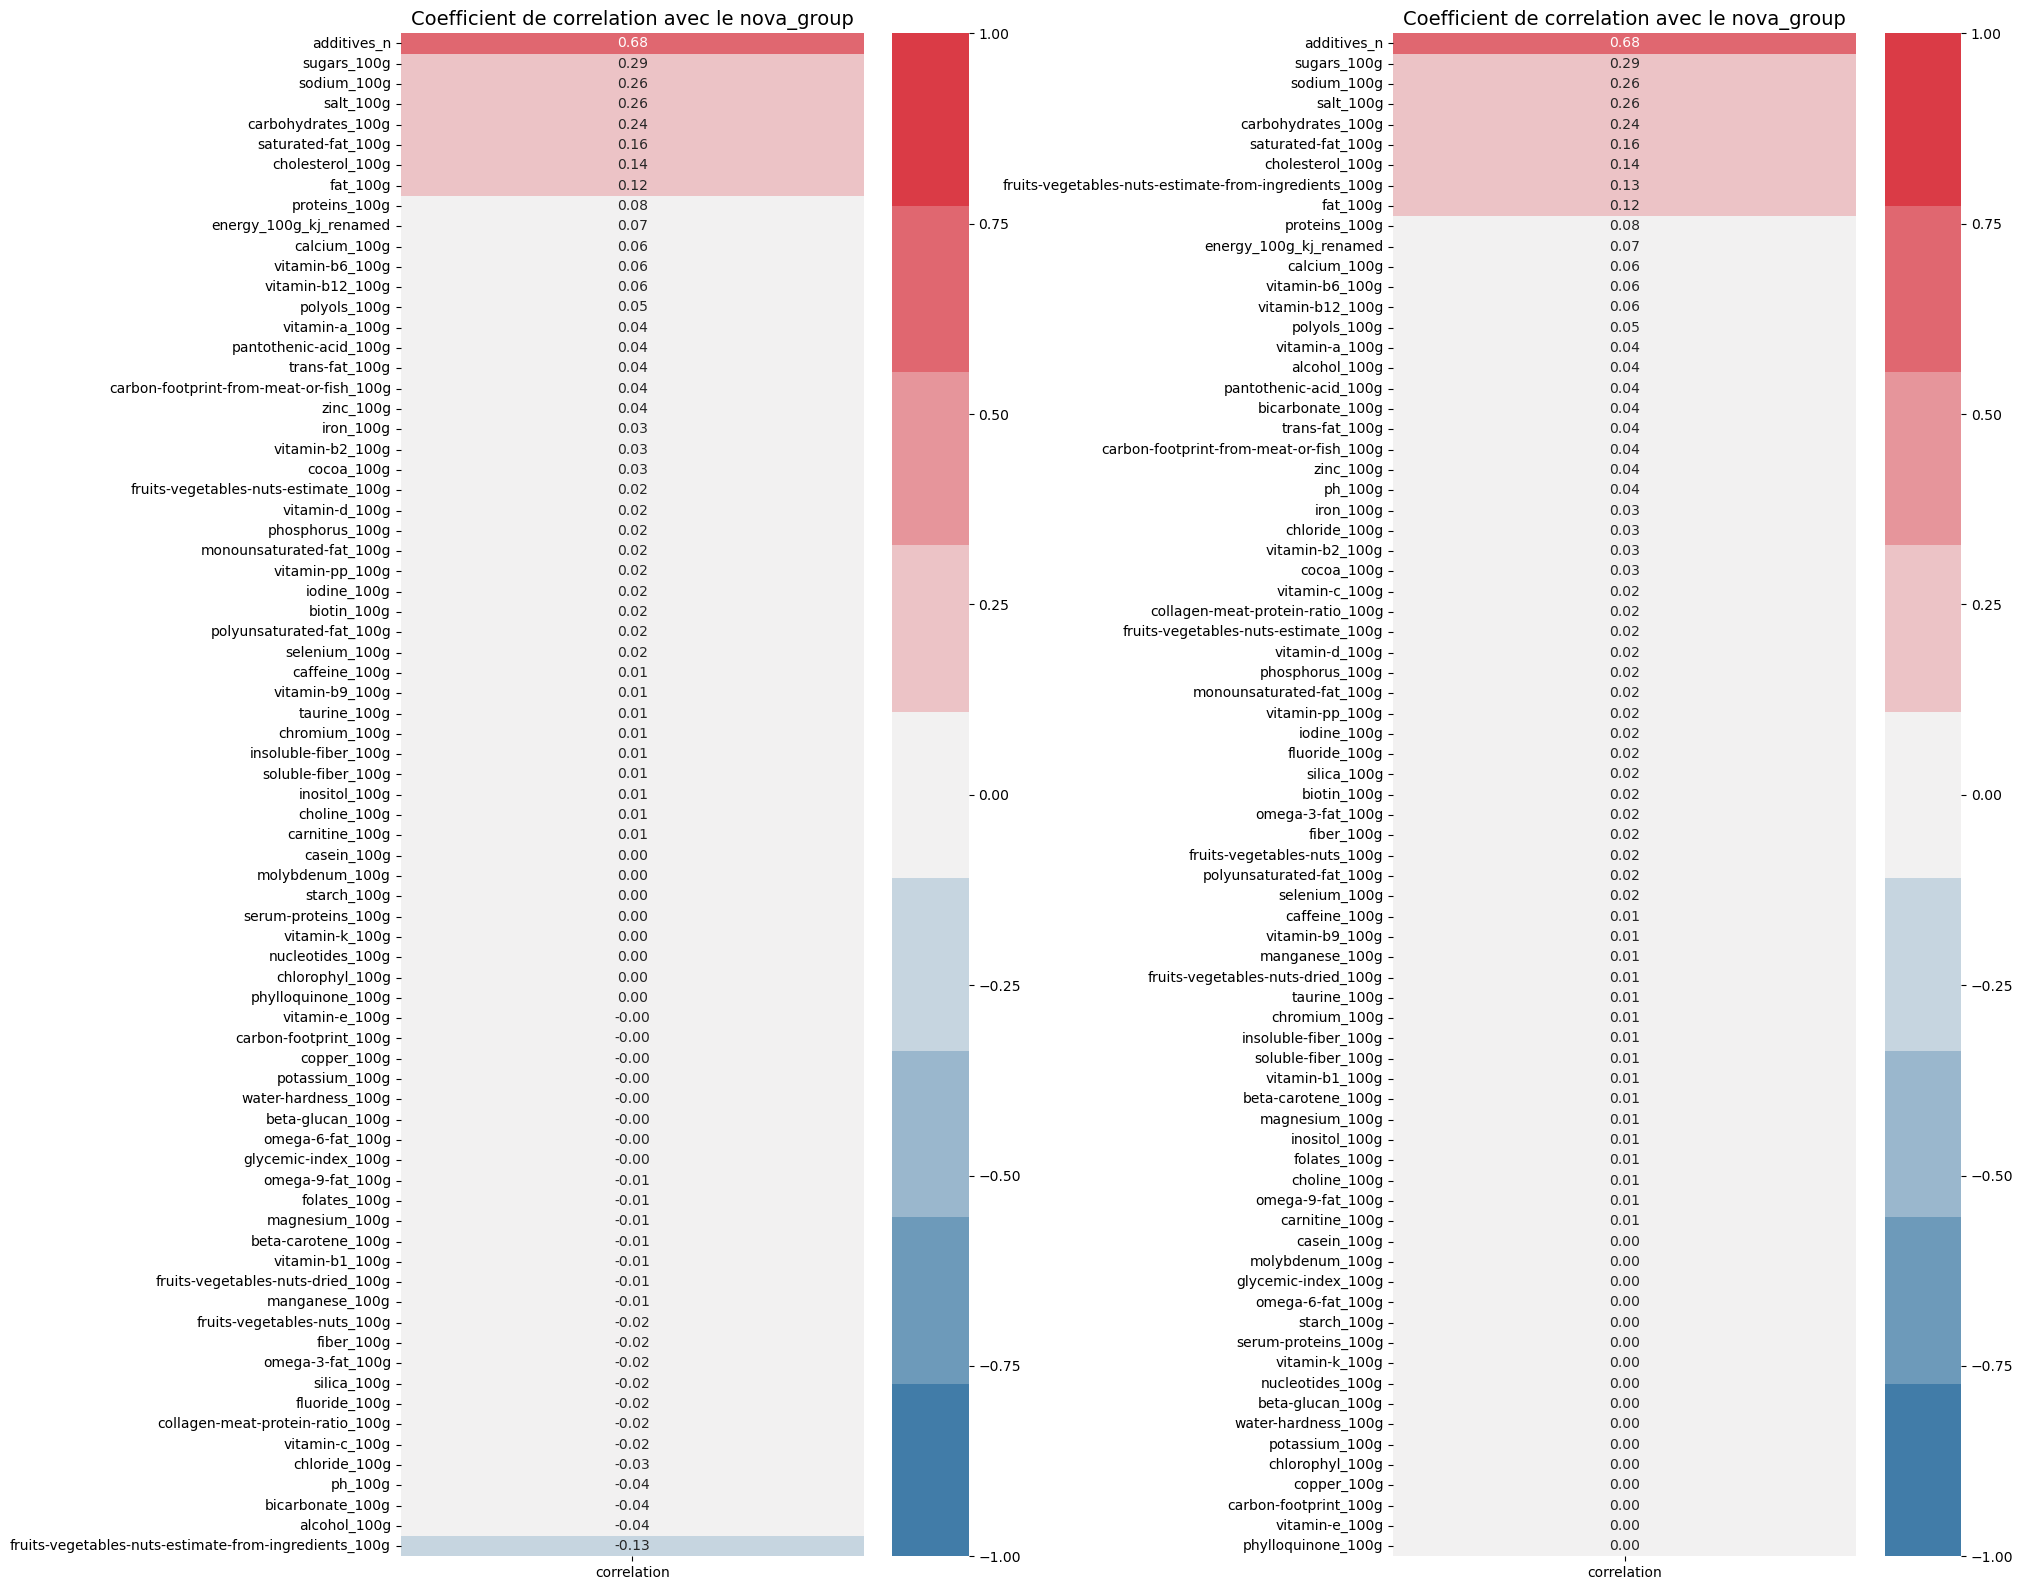

In [16]:
corr_nova_group = pd.DataFrame(df_exploration[cols_num].corrwith(df_exploration["nova_group"], method = 'spearman'))
corr_nova_group.columns =['correlation']
outils.plot_correlation_matrix_with(corr_nova_group,'correlation','nova_group')

## 5.3 Matrice de corrélation avec le nova group réduite

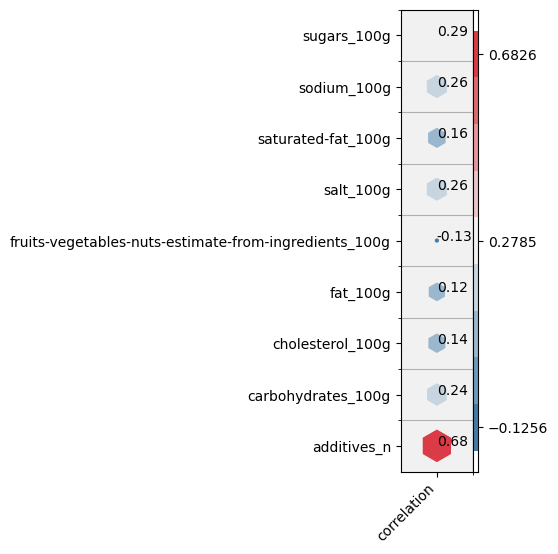

In [17]:
#test = corr_nova_group.drop(corr_nova_group.loc[corr_nova_group.abs().sort_values(by='correlation', ascending = False)['correlation'] <0.1].index)
corr_nova_group.drop(corr_nova_group.loc[corr_nova_group.abs().sort_values(by='correlation', ascending = False)['correlation'] <0.1].index, inplace = True)
corr_nova_group
plt.figure(figsize=(1, 6))
outils.heatmap(x_param = ['correlation' for i in range(corr_nova_group.shape[0])],
    y_param=corr_nova_group.index,
    size=corr_nova_group['correlation'],
    color=corr_nova_group['correlation'],
    palette=sns.diverging_palette(240, 10, n=9),
    marker='h')


## 5.4 Matrice de corrélation réduite aux variables qui corrélent le mieux

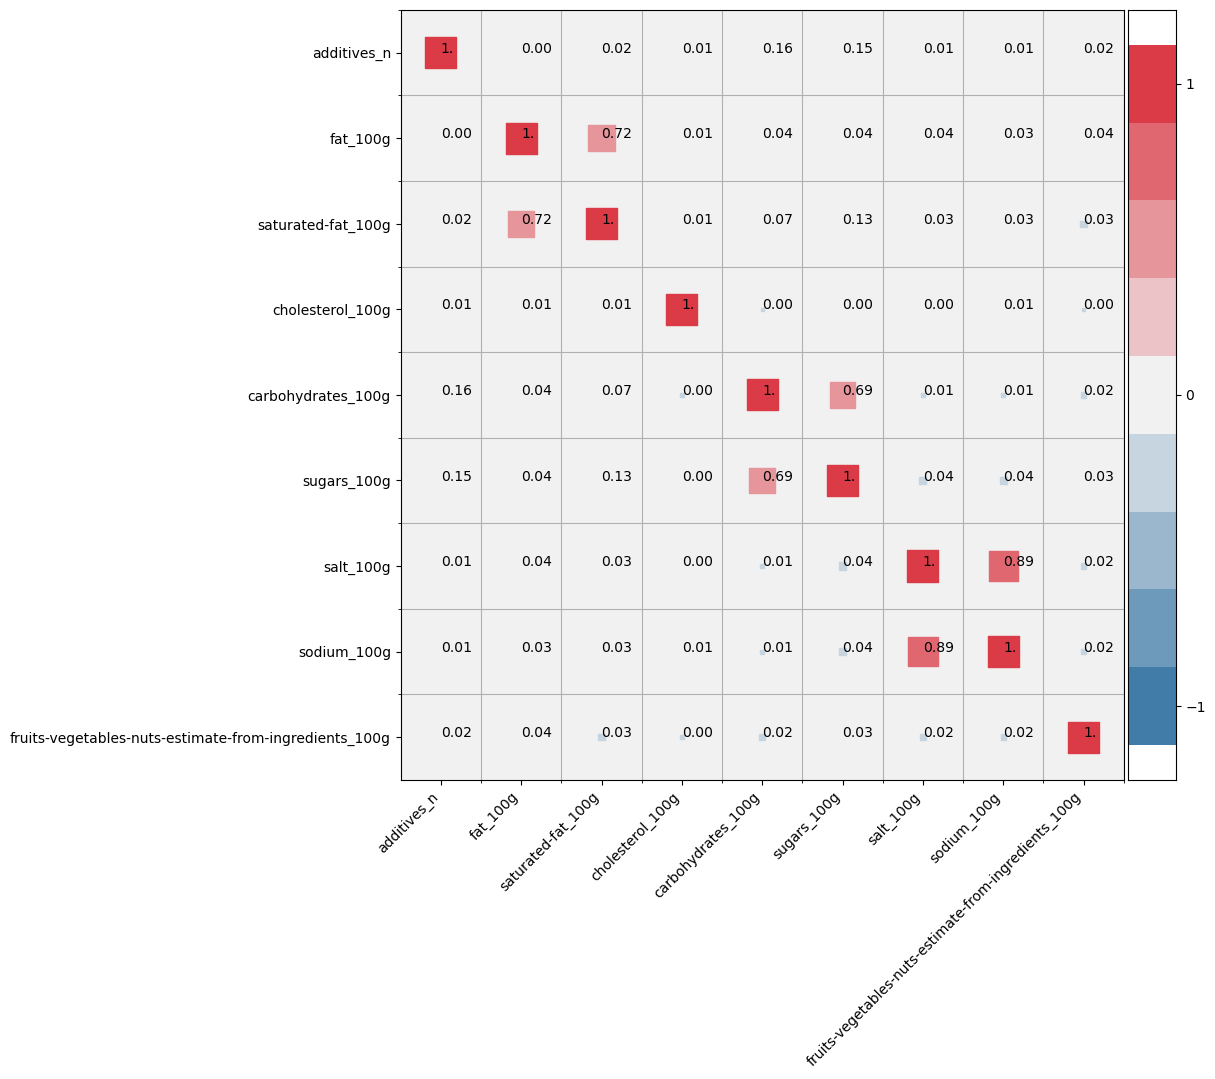

In [18]:
plt.figure(figsize=(10, 10))
colonnes_selectionnees_2 = list(dict.fromkeys(list(corr_nova_group.index)))
corr_2 = df_exploration[colonnes_selectionnees_2].corr()
outils.corrplot(corr_2)

## 5.5 Boxplot

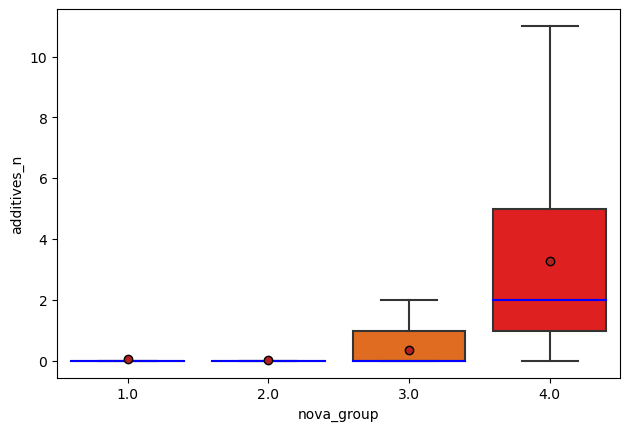

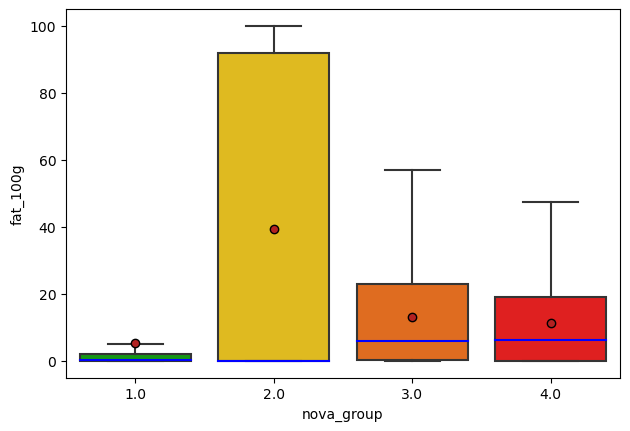

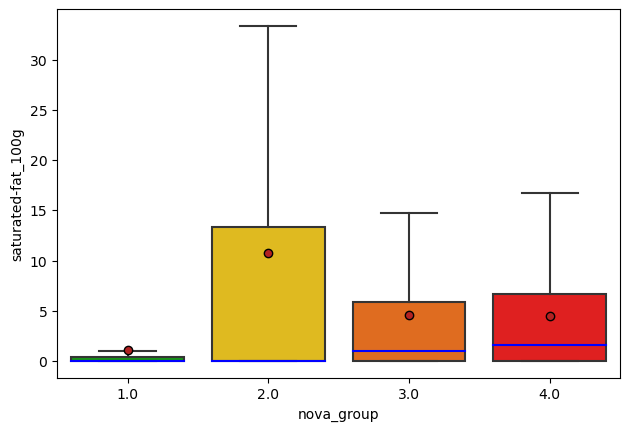

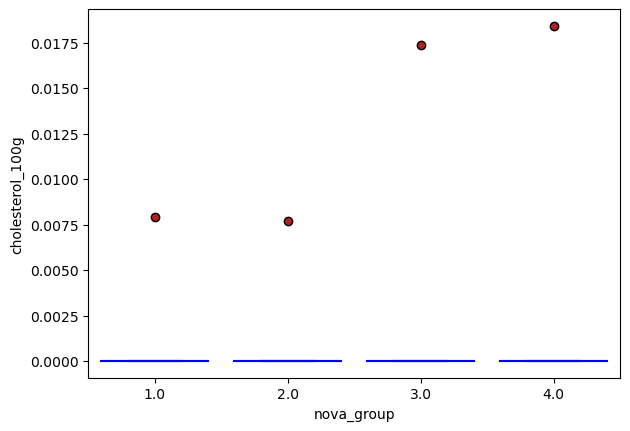

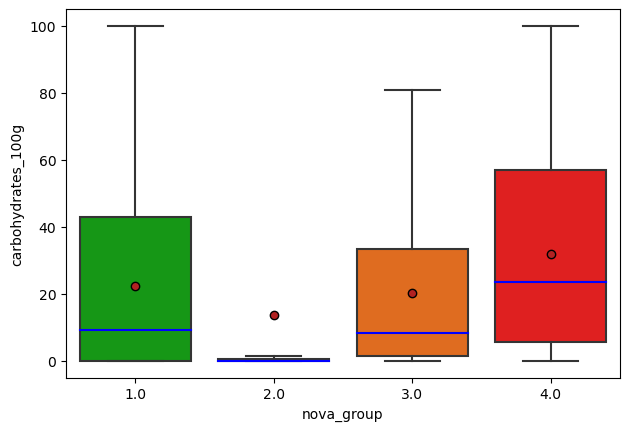

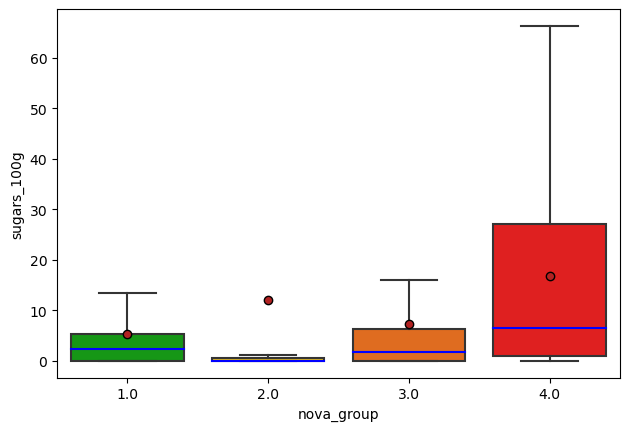

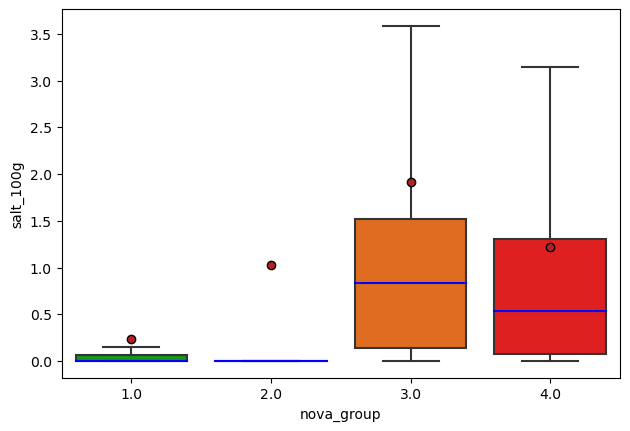

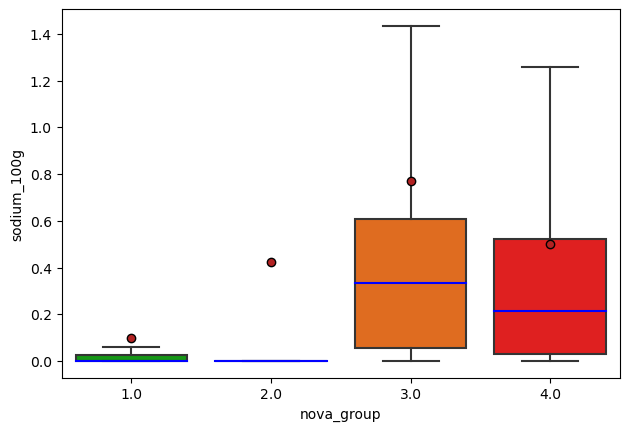

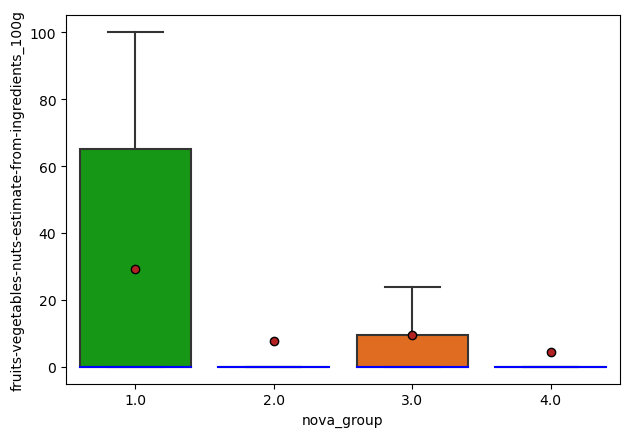

In [19]:
medianprops = {'color':"blue"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
for colonne in colonnes_selectionnees_2:
    sns.boxplot(data=df_exploration, x='nova_group', 
                y=colonne, palette=sns.color_palette( ['#00ac00', '#ffcd00', '#ff6600', '#ff0000']), 
                showmeans=True,
                medianprops=medianprops,
                meanprops=meanprops,
                showfliers=False)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    

 

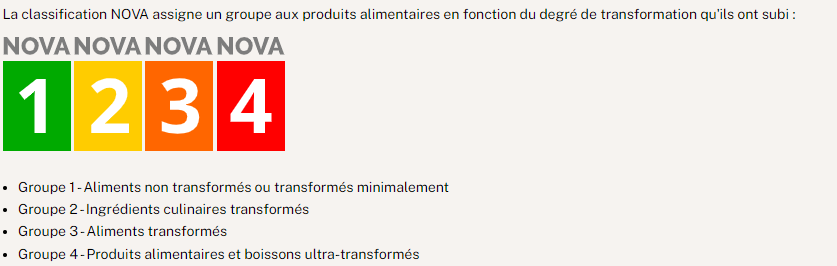
- Plus il y a d'additifs, plus le nova score est élevé, ce qui est cohérent avec la définition du nova score;
- Les aliments transformés et ultra-transformés ont un taux de cholestérol plus élevé
- Les aliments non transformés ou transformés minimalement contiennent très peu de lipides et d'acides gras saturés
- Plus le produit contient de sucre et de glucide, plus le produit est transformé.
- Plus le produire contient de sel et de sodium, plus il est transformé;
- Plus le produit cotneint de fruits, légumes et noix, moins il est transformé.

# 6. Analyse des variables retenues post corrélation

In [20]:
nutriscore_grade_color =['#ee8100', '#85bb2f', '#038141', '#fecb02', '#e63e11']
nova_group_color = ['#00ac00', '#ffcd00', '#ff6600', '#ff0000']

In [21]:
variables_etudiees = list(dict.fromkeys(colonnes_selectionnees+colonnes_selectionnees_2))
variables_etudiees

['additives_n',
 'energy_100g_kj_renamed',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'fruits-vegetables-nuts-estimate-from-ingredients_100g',
 'cholesterol_100g',
 'salt_100g',
 'sodium_100g']

### Imputation de de la variable energy_100g_kj_renamed à l'aide de IterativeImputer

Préalablement à l'analyse des données, on finit l'imputation de celles-ci. La dernière variable est energy_100g_kj_renamed que l'on va imputer à l'aide de IterativeImputer et des données réduites

In [ ]:
imputer = IterativeImputer(random_state=42)
imputed  = imputer.fit_transform(df_exploration[variables_etudiees])
df_imputed = pd.DataFrame(imputed, columns=df_exploration[variables_etudiees].columns)

round(df_imputed, 2)

In [138]:

df_exploration['energy_100g_kj_renamed'].update(df_imputed['energy_100g_kj_renamed'])


## 6.1 Pairplot

In [ ]:
# Pairplot avec un échantillon de 10% des individus, pour accélerer l'affichage.
#outils.pairplot(df_exploration,variables_etudiees,'nutriscore_grade',nutriscore_grade_color,0.1)

In [ ]:
# Pairplot avec un échantillon de 10% des individus, pour accélerer l'affichage.
#outils.pairplot(df_exploration,variables_etudiees,'nova_group',nova_group_color,0.1)

## 6.2 Correlation matrix

In [ ]:
plt.figure(figsize=(10, 10))
corr_finale = df_exploration[variables_etudiees].corr()
outils.corrplot(corr_finale)

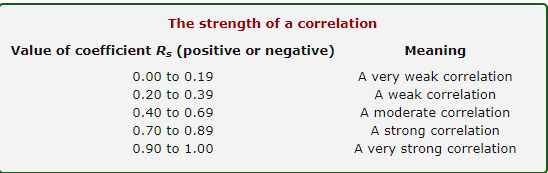
- Les variables sel et sodium sont très fortements corrélées
- les variables sucre et glucides fortement corrélées
- les variables lipides et acides gras saturés fortement corrélées

## 6.3 Distributions

In [ ]:
for colonne in variables_etudiees:
    if colonne != 'energy_100g_kj_renamed':
        outils.plot_histogram(df_exploration,colonne,True)
    else:
        outils.plot_histogram(df_exploration,colonne,False)
    outils.test_normalite(df_exploration[colonne])
    outils.stat_descriptives(df_exploration,[colonne])

**Conclusion**
- Les distributions des variables ne suivent pas une loi normale, ce qui est confirmé par les 3 tests;
- Les skewness sont positifs, les distribution sont étalées sur la droite;
- Le kurtosis est positif, indiquant des distributions plus pointues que celle que suivrait une loi normale. Les variables sont surgaussiennes

## 6.4 Analyse explicative: Tests non paramétriques

Les variables étudiées ne suivent pas une loi normale, il est donc exclu d'utiliser la méthode ANOVA à sens unique pour epliquer la variance des moyennes
des groupes de variable par nova_group.  
On propose d'utiliser le test de kruskal-wallis.  
H0 - hypothèse nulle :  Au moins un des groupes de variable par groupe NOVA à une moyenne différente des autres groupes.   
H1 - hypothèse alternative : les moyennes de la variable par groupe NOVA sont égales μ(groupe NOVA 1)=μ(groupe NOVA 1)=μ(groupe NOVA 2)=μ(groupe NOVA 4).   
Si P value < 0.05, l'hypothèse nulle est validée et au moins un des groupes à une moyenne significativement différente des autres groupes pour la variable considérée


De même, pour étudier la variance des moyennes avec le nutriscore score, nous propospoer d'utiliser le test de wilcoxon:
H0 - hypothèse nulle :  les deux échantillons sont significativement différents  
H1 - hypothèse alternative : les deux échantillons ne sont pas significativement différents   
Si P value > 0.05, l'hypothèse nulle est rejetée.


In [ ]:

variables_etudiees.append('nova_group')
variables_etudiees.append('nutriscore_score')


In [ ]:
# """"
# https://statistics.laerd.com/spss-tutorials/kruskal-wallis-h-test-using-spss-statistics.php#:~:text=Introduction,continuous%20or%20ordinal%20dependent%20variable.
# """"
reload(outils)
from scipy.stats import pearsonr,shapiro, normaltest, anderson, kruskal, wilcoxon

outils.test_non_oarametriques(df_exploration,'krustal','nova_group',variables_etudiees)
outils.test_non_oarametriques(df_exploration,'wilcoxon','nutriscore_score',variables_etudiees)


In [ ]:
variables_etudiees.remove('nova_group')
variables_etudiees.remove('nutriscore_score')

**Conclusion**  
Tous les tests valident l'hypothèse H0, les échantillons comparés sont bien statistiquement différents.

# 7. Analyse des Composantes Principales

In [ ]:
# Sélection des colonnes pour l'ACP
variables_acp = variables_etudiees.copy()
variables_acp.append('nova_group')
variables_acp.append('nutriscore_score')

In [ ]:
# Nombre de composantes
n_comp = len(variables_acp)
# Données pour l'ACP
df_acp = df_exploration[variables_acp].dropna(axis=0,subset = ['nova_group','nutriscore_score','energy_100g_kj_renamed'])
# Noms affichés
names = df_exploration['product_name']
features = df_acp.columns
X = df_acp.values

In [ ]:
# Centrage et Réduction - Mise à l'échelle
std_scaler = preprocessing.StandardScaler().fit(X)
X_scaled = std_scaler.transform(X)

In [ ]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

In [ ]:
# Valeurs propres ou variances des composantes principales
val_propres = pca.explained_variance_
val_propres

In [ ]:
# Vecteurs propres de l'ACP non réduite = combinaison linéaire permettant de
# définir les variables principales
pca.components_.T

In [ ]:
df_acp = pd.DataFrame(pca.components_,
                      index=['PC'+str(i+1) for i in range(n_comp)],
                      columns=variables_acp).T
df_acp

## 6.2 Composantes principales

In [ ]:
# Composantes principales de l'ACP
C = pca.transform(X_scaled)


medianprops = {'color':"blue"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.figure(figsize=(15, 10))
plt.subplot(2, 1,1)
plt.boxplot(C,
            showmeans=True,
            medianprops=medianprops,
            meanprops=meanprops,
            showfliers=True,
            labels = ['PC'+str(i+1) for i in range(n_comp)])

plt.title('Distribution des composantes principales')
plt.grid(False)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.subplot(2, 1,2)
plt.boxplot(C,
            showmeans=True,
            medianprops=medianprops,
            meanprops=meanprops,
            showfliers=False,
            labels = ['PC'+str(i+1) for i in range(n_comp)])

plt.title('Distribution des composantes principales')
plt.grid(False)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

## 6.3 Variance cumulée en fonction des composantes

In [ ]:
# quel est le pourcentage de variance préservée par chacune de nos composantes?
variances = pca.explained_variance_ratio_
 
# somme cumulée de chacune des variances
somme_cumulee_variance = np.cumsum(variances)
taux_cumule_optimal = 0.95
#  on va trouver le moment où on attient 95% ou 99% entre réduire au maxi
# où garder au maxi
plt.plot(somme_cumulee_variance)
# argmax pour > 95 %
best = np.argmax(somme_cumulee_variance > taux_cumule_optimal)
plt.axhline(y=taux_cumule_optimal, color='r')
plt.text(2, 0.96, '>' + f"{taux_cumule_optimal:.0%}", color='r', fontsize=10)
plt.axvline(x=best, color='r')
plt.xticks(np.arange(0, n_comp+1, 1.0))
plt.title('Taux cumulé de variances expliquées pour les composantes')
plt.xlabel('Nombre de composantes')
plt.ylabel('Taux cumulé des variances')
plt.show()

## 6.4 Matrice des coefficients des composantes principales

In [ ]:

fig, ax = plt.subplots(figsize=(8, 4))
palette = sns.diverging_palette(240, 10, n=9)
ax = sns.heatmap(df_acp, annot=True, fmt='.2f',
                 cmap=palette, vmin=-1, vmax=1, center=0)
plt.title('Coefficient des composantes principales', fontsize=14)
plt.show()

## 6.5 Scree plot des valeurs propres

In [ ]:
outils.display_scree_plot(pca,n_comp)

 - Aucun coude
 - La première composante explique près d'un quart de la variance
 - La dernière composante n'explique aucune variance

## 6.6 Cercle des corrélations 

In [ ]:
pcs = pca.components_
outils.display_circles(pcs,
                       n_comp,
                       pca, 
                       [(0, 1), (2, 3),(4,5)],
                       labels=np.array(features), 
                       label_rotation=0, 
                       lims=None, 
                       width=16, 
                       n_cols=1)

 - Les variables nutriscore score, acides gras saturés et lipides ainsi que le contenu énergétiques sont fortement positivement corrélés avec F1. Le sucre et les glucides sont les deux autres variables qui correlent avec F1. Les aliments les plus gras et les plus sucrés sont les plus mauvais pour la santé mais aussi les plus énergétiques.   
 - F1 représente les apports journaliers recommandés en lipides et acides gras saturés, et dans une moindre mesure en sucre.  F1 code les lipides, acides gras saturés, sucre
  
 - Le nombre d'additifs et le groupe NOVA corrélent fortement de façon positive avec F2. Les variables sels et sodium, fortement corrélées, corrélent positivement avec F2. Les aliments ultra-transformés sont riches en sucre et en graisse. F2 code ces 4 variables
 - F2 représente les nutriments  
 - F3 représente le sel
 - F4 représente le surcre et les glucides   

## 6.7 Projections sur les plans factoriels

In [ ]:
reload(outils)

X_ech_index = df_exploration.dropna(axis = 0, subset = ['nutriscore_score','nova_group', 'energy_100g_kj_renamed']).loc[:, variables_acp].sample(frac=0.1).index
X_ech = df_exploration.dropna(axis = 0, subset = ['nutriscore_score','nova_group', 'energy_100g_kj_renamed']).loc[X_ech_index, variables_acp].values
X_proj_ech = preprocessing.StandardScaler().fit_transform(X_ech)

outils.display_factorial_planes(X_proj_ech, n_comp, pca, [(0, 1), (2, 3), (4, 5)],
                                    n_cols=1, couleurs=nutriscore_grade_color,
                                    labels=np.array(X_ech_index), width=6,
                                    illus_var=df_exploration.dropna(axis = 0, subset = ['nutriscore_score','nova_group', 'energy_100g_kj_renamed']).loc[X_ech_index,
                                                       'nutriscore_grade'],
                                    lab_on=False, alpha=0.6)

In [ ]:
X_ech_index = df_exploration.dropna(axis = 0, subset = ['nutriscore_score','nova_group', 'energy_100g_kj_renamed']).loc[:, variables_acp].sample(frac=0.1).index
X_ech = df_exploration.dropna(axis = 0, subset = ['nutriscore_score','nova_group', 'energy_100g_kj_renamed']).loc[X_ech_index, variables_acp].values
X_proj_ech = preprocessing.StandardScaler().fit_transform(X_ech)

outils.display_factorial_planes(X_proj_ech, n_comp, pca, [(0, 1), (2, 3), (4, 5)],
                                    n_cols=1, couleurs=nova_group_color,
                                    labels=np.array(X_ech_index), width=6,
                                    illus_var=df_exploration.dropna(axis = 0, subset = ['nutriscore_score','nova_group', 'energy_100g_kj_renamed']).loc[X_ech_index,
                                                       'nova_group'],
                                    lab_on=False, alpha=0.6)